In [1]:
# 外部ライブラリのインポート
import numpy as np

# 自作パッケージのインポート
from libs.Horcher_Fertility_model import Horcher_Fertility_model

In [3]:
# モデルの定義
model = Horcher_Fertility_model(2,2)

# 外生変数の設定
exog = {
    't_ij': np.array([
        [45, 75],
        [75, 30]
    ])/(60*24),
    'tau_ij': np.array([
        [0.006, 0.010],
        [0.010, 0.005]
    ]),
    'p_i': np.array([1.0, 1.0]), 
    'L_i': np.array([60, 60])
}
# パラメータの設定
param = {    
    'alpha':   0.80,
    'gamma':   9/24,
    'psi':     0.25,
    'L':       1,
    'T':       8/24,
    'N':       100,
    'mu_cost': 0.05,
    'mu_time': 0.1,
    'mu_room': 0.1
}
# 基準均衡時の内生変数の設定
ref = {
    'lambda_ij': np.array([
        [0.25, 0.30],
        [0.05, 0.40]
    ]),
    'n_ij': np.array([
        [1.0, 1.0],
        [1.0, 1.0]
    ]),
    'q_i':   np.array([0.95, 1.1]),
    'Q_j':   np.array([1.5, 1.5]),
    'w_j':   np.array([0.95, 1.05])
}

In [4]:
# 1.外生変数の入力
model.set_exog(exog)

p_i array has been stored.
L_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.


In [5]:
# 2.パラメータの入力
model.set_param(param)

In [6]:
# 3.基準均衡時の内生変数の入力
model.set_ref(ref)

q_i array has been stored.
Q_j array has been stored.
w_j array has been stored.
lambda_ij array has been stored.
n_ij array has been stored.
### Check the setting of reference variables ###
N_R_i: 居住人口
[55. 45.]
N_W_j: 就業人口
[30. 70.]
M_R_i: 労働供給
[54.9034749  47.21780604]
M_W_j: 労働需要
[30.57915058 71.54213037]
v_ij: 時間価値
[[2.58925714 2.69837838]
 [2.43891892 2.95058824]]
mu_ij: 子供の実質費用
[[0.40392571 0.41483784]
 [0.40389189 0.45505882]]
n_i: 地域の子供の数
[55. 45.]
delta_ij: 子供の消費性向
[[0.41600165 0.40996261]
 [0.44160757 0.4112706 ]]
beta_ij: 基本財の消費性向
[[0.46719868 0.47202991]
 [0.44671395 0.47098352]]
theta_ij: 土地の消費性向
[[0.11679967 0.11800748]
 [0.11167849 0.11774588]]
C_ij: 一世帯当たり基本財消費量
[[0.45363657 0.47764324]
 [0.40856216 0.52112941]]
H_R_ij: 一世帯当たり居住地面積
[[0.21937805 0.22569559]
 [0.19285504 0.2184385 ]]
H_R_i: 居住地面積
[12.25531884  9.70181529]
################################################


### Check the regression result ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     16.47
Date:                Mon, 26 Aug 2024   Prob (F-statistic):             0.0557
Time:                        07:36:49   Log-Likelihood:               -0.37995
No. Observations:                   4   AIC:                             4.760
Df Residuals:                       2   BIC:                             3.532
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26

/Users/nagampere/File/horkew/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


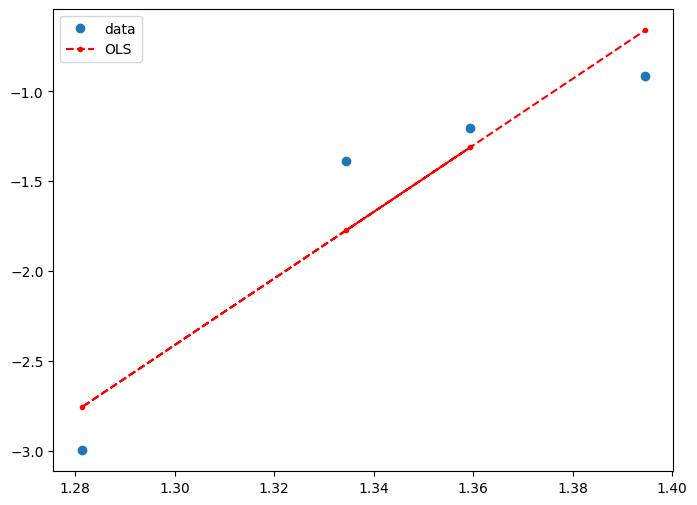

###################################


In [7]:
# 4.フレシェ分布のパラメータ-𝜖の推定
model.estimate_epsilon('OLS')

In [8]:
# 5.基準均衡時の内生変数をもとに、外生変数の推定
model.recover_fundamentals()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00022893816733006455
       x: [ 1.179e+00  8.078e-01  1.120e+00  8.719e-01]
     nit: 7
     jac: [ 1.399e-04 -2.042e-04  5.737e-05 -7.369e-05]
    nfev: 35
    njev: 7
### Check the estimation result ###
utility
[[5.29235762e+10 8.39568438e+10]
 [1.97754834e+10 1.60946094e+11]]
X_i
[1.17919513 0.80775832]
E_j
[1.12010194 0.87194049]
XE
[[1.32081876 1.02818798]
 [0.90477166 0.70431719]]
λ_ij
[[0.24315988 0.3002812 ]
 [0.06223943 0.39431949]]
Σλ_ij
1.0
###################################
### Check the estimated variables ###
A_j: 就業地の生産レベル(外生変数)
[1.7167978  1.85990903]
xi_i: 地域iにおける商業地の相対地価(外生変数)
[1.57894737 1.36363636]
H_W_j: 商業地面積
[ 4.84169884 12.51987281]
H_i: 床面積
[17.09701768 22.22168811]
q_ave_i:  居住地の平均価格
[1.10575432 1.32536313]
φ_i: 土地賦存量に対する床面積の割合
[0.499585   0.37708335]
H_ave_i: 仮想的な床面積の最大量(外生変数)
[34.16567751 35.67361389]
#####################################


In [9]:
# 6.現況再現性の確認
model.check_replication('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [ 2.583e-12  2.967e-12]
       x: [ 9.505e-01  1.050e+00]
  method: hybr
    nfev: 13
    fjac: [[-8.808e-01  4.736e-01]
           [-4.736e-01 -8.808e-01]]
       r: [-4.011e+02  3.154e+02 -2.344e+02]
     qtf: [ 6.534e-09  2.641e-08]
w_j: 賃金率
[0.95046583 1.05012829]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.24466188 0.30059337]
 [0.06227052 0.39247423]]
v_ij
[[2.59053483 2.69871125]
 [2.44012755 2.95095048]]
mu_ij: 子供のコスト
[[0.40386738 0.41468502]
 [0.40395901 0.4550413 ]]
n_ij: 一世帯あたり子供の数
[[1.00063797 1.00049191]
 [1.00032933 1.00016128]]
n_i: 地域の子供の数
[54.55591988 45.48285582]
n: 子供の総数
100.03877569324905
q_i: 居住用地価
[0.94813898 1.09946255]
Q_j: 業務用地価
[1.49706155 1.49926711]
q_ave_i: 土地の平均価格
[1.10698982 1.32298003]
N_R_i: 居住人口
[54.5255247 45.4744753]
N_W_j: 勤務人口
[30.69323998 69.30676002]
M_R_i: 労働供給量
[54.41214411 47.61484

In [10]:
# 7.外生変数の再入力
model.change_exog(
    {
        't_ij': np.array([
            [45, 60],
            [60, 15]
        ])/(60*24),
        'tau_ij': np.array([
            [0.006, 0.009],
            [0.009, 0.004]
        ])
    }
)

In [11]:
# 8.新しい外生変数による一般均衡分析と, 内生変数の導出
model.simulate_project('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [ 3.340e-13  2.842e-13]
       x: [ 9.521e-01  1.043e+00]
  method: hybr
    nfev: 13
    fjac: [[-8.896e-01  4.567e-01]
           [-4.567e-01 -8.896e-01]]
       r: [-3.831e+02  3.017e+02 -2.327e+02]
     qtf: [ 1.976e-09  4.525e-09]
w_j: 賃金率
[0.95206216 1.0434209 ]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.20584416 0.33237217]
 [0.06722345 0.39456021]]
v_ij
[[2.59491335 2.75845573]
 [2.51483243 3.02376988]]
mu_ij: 子供のコスト
[[0.40367093 0.42002517]
 [0.41428393 0.46517768]]
n_ij: 一世帯あたり子供の数
[[1.00281704 1.00963924]
 [1.00526077 1.00251021]]
n_i: 地域の子供の数
[54.20000175 46.31277431]
n: 子供の総数
100.51277605875424
q_i: 居住用地価
[0.94179593 1.12800691]
Q_j: 業務用地価
[1.4870462  1.53819124]
q_ave_i: 土地の平均価格
[1.08777282 1.36007071]
N_R_i: 居住人口
[53.82163315 46.17836685]
N_W_j: 勤務人口
[27.30676157 72.69323843]
M_R_i: 労働供給量
[54.40975933 49.765

In [12]:
# 9.一般均衡分析の結果の評価
model.evaluate_res()

In [14]:
# 評価結果の可視化
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker
import matplotlib.patheffects as patheffects

# ダミーのポリゴンを作成
polygons = [
    Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
    Polygon([(1, 0), (1, 1), (2, 1), (2, 0)])
]

# gdfに変換
gdf_change = gpd.GeoDataFrame(
    model.change,
    geometry = polygons
)
gdf_rep = gpd.GeoDataFrame(
    {
        k:((np.sum(v*model.rep['lambda_ij'], axis=1)/np.sum(model.rep['lambda_ij'], axis=1)) 
            if v.ndim == 2 else v) 
        for k,v in model.rep.items() 
    },
    geometry = polygons
)
gdf_res = gpd.GeoDataFrame(
    {
        k:((np.sum(v*model.res['lambda_ij'], axis=1)/np.sum(model.res['lambda_ij'], axis=1)) 
            if v.ndim == 2 else v) 
        for k,v in model.res.items() 
    },
    geometry = polygons
)
gdf_diff = gpd.GeoDataFrame(
    {
        k:((np.sum((model.res[k]-v)*model.rep['lambda_ij'], axis=1)/np.sum(model.rep['lambda_ij'], axis=1)) 
            if v.ndim == 2 else model.res[k]-v) 
        for k,v in model.rep.items() 
    },
    geometry = polygons
)

def plot_change(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    norm = Normalize(vmin=-10, vmax=10)
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = 'seismic',
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}%'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/{name}_change.png",bbox_inches="tight")
    # 可視化
    plt.show()

def plot_value(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    top = max(abs(gdf[name]))*1.5
    if min(gdf[name]) < 0 :
        norm = Normalize(vmin=-top, vmax=top)
        cmap = 'seismic'
    else: 
        norm = Normalize(vmin=0, vmax=top)
        cmap = 'Reds'
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = cmap,
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/{name}_value.png",bbox_inches="tight")
    # 可視化
    plt.show()

In [15]:
gdf_change.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.167953,-0.66900,-0.66900,1.296294,0.688101,-1.290940,0.601749,-0.652391,-1.290940,-11.033304,-0.004383,-10.661959,1.365487,0.348687,-9.909206,-2.619810,-10.511913,-1.735969,2.632968,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.638722,2.59621,2.59621,2.548979,2.272537,1.547883,0.270202,1.824684,1.547883,4.886217,4.516300,7.735733,0.099028,1.541407,4.338748,3.105307,7.047601,2.803571,-5.102140,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


In [16]:
gdf_rep.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.950466,1.497062,0.948139,2.650171,0.409831,0.275496,1.000557,54.555920,54.525525,30.69324,54.412144,31.223975,0.223193,12.169704,4.955929,17.125633,37.096652,1.10699,0.498747,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1.050128,1.499267,1.099463,2.881001,0.448046,0.347258,1.000184,45.482856,45.474475,69.30676,47.614849,70.803017,0.215029,9.778317,12.398100,22.176417,92.940315,1.32298,0.378352,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


In [17]:
gdf_res.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.952062,1.487046,0.941796,2.695908,0.413770,0.283981,1.007030,54.200002,53.821633,27.306762,54.409759,27.894888,0.226900,12.212138,4.464836,16.676974,33.197084,1.087773,0.511879,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1.043421,1.538191,1.128007,2.949682,0.457769,0.346909,1.002911,46.312774,46.178367,72.693238,49.765278,76.280149,0.215015,9.929041,12.936022,22.865063,99.490378,1.360071,0.359048,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


In [18]:
gdf_diff

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.001596,-0.010015,-0.006343,0.034901,0.002856,0.000101,0.006021,-0.355918,-0.703892,-3.386478,-0.002385,-3.329087,0.00307,0.042434,-0.491093,-0.448659,-3.899568,-0.019217,0.013132,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.006707,0.038924,0.028544,0.073078,0.010162,0.002479,0.002703,0.829918,0.703892,3.386478,2.150429,5.477132,0.00020,0.150724,0.537922,0.688646,6.550063,0.037091,-0.019304,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


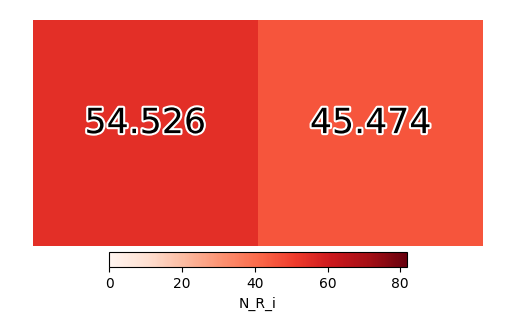

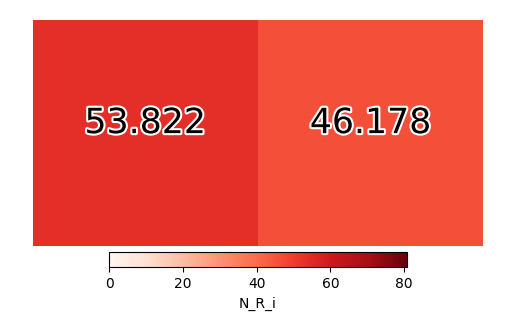

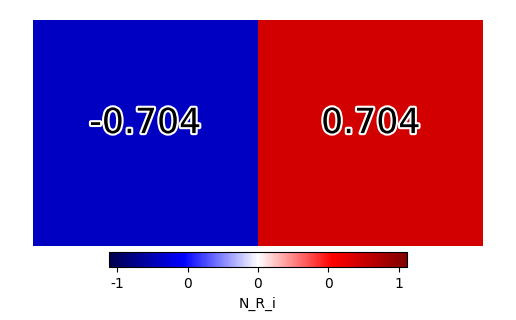

In [19]:
plot_value(gdf_rep, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_value(gdf_res, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_value(gdf_diff, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')

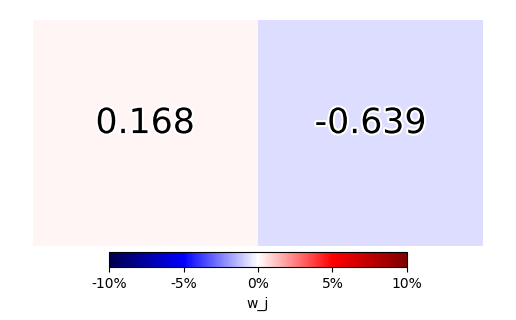

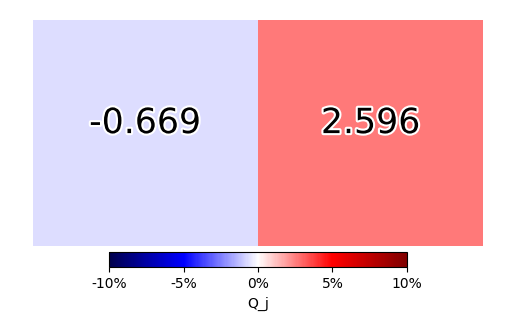

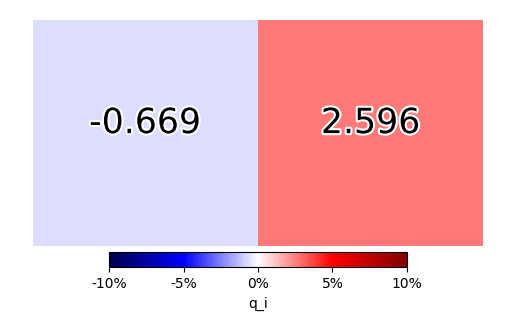

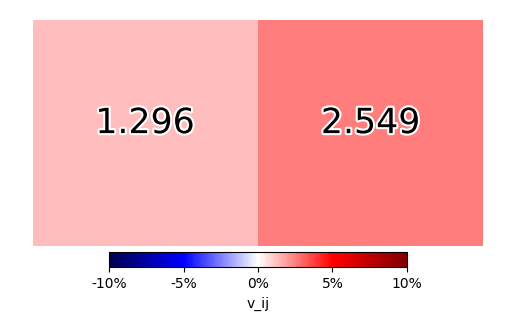

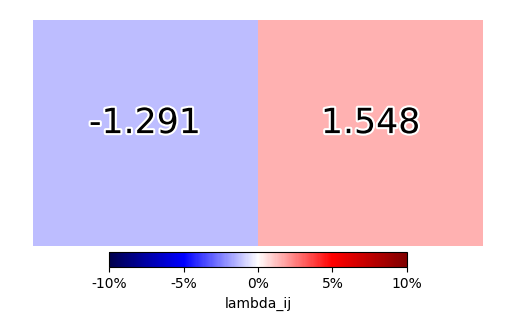

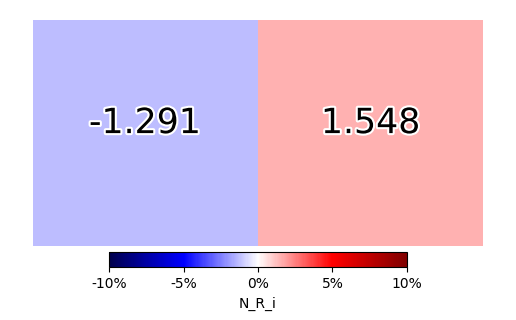

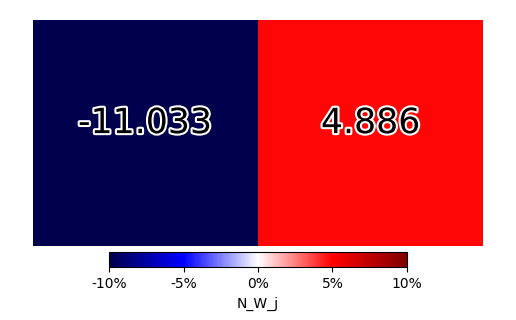

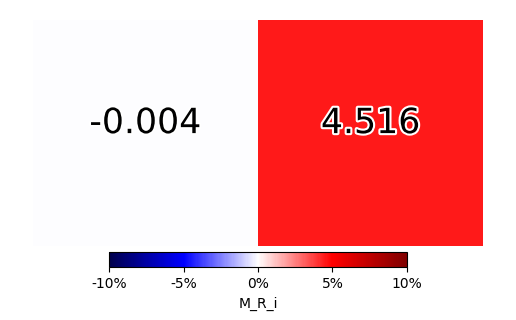

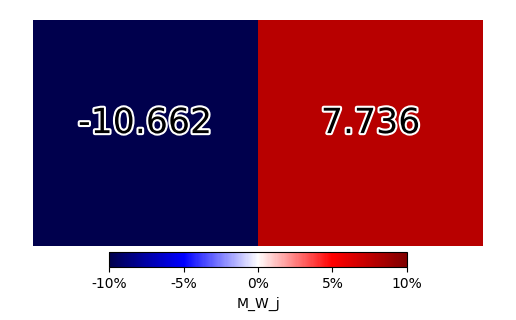

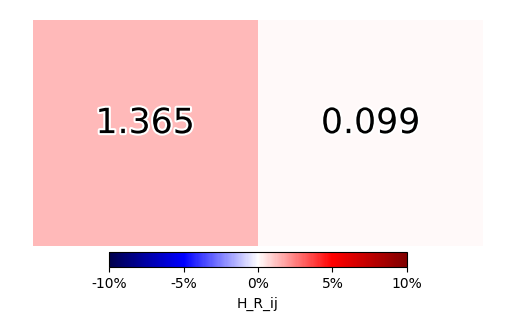

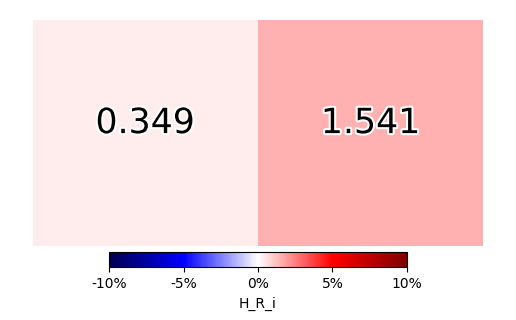

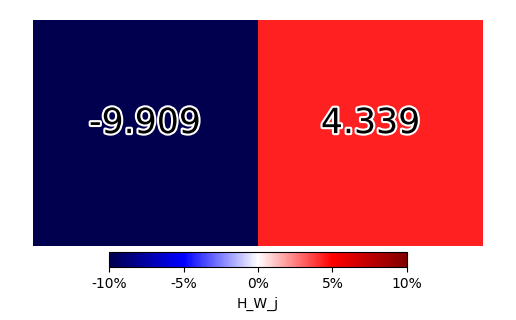

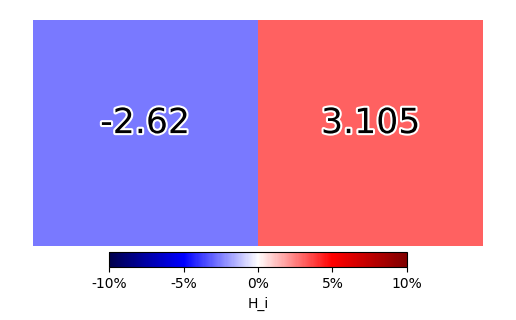

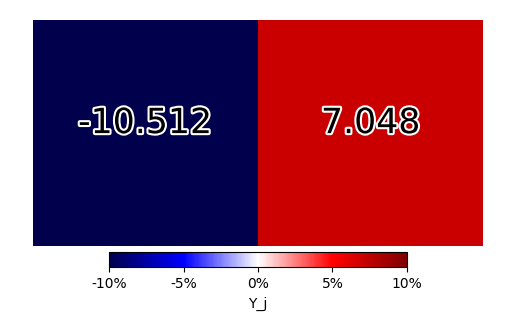

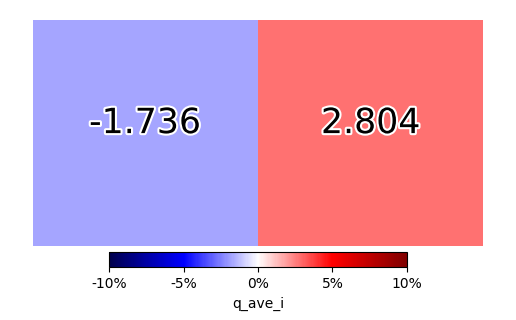

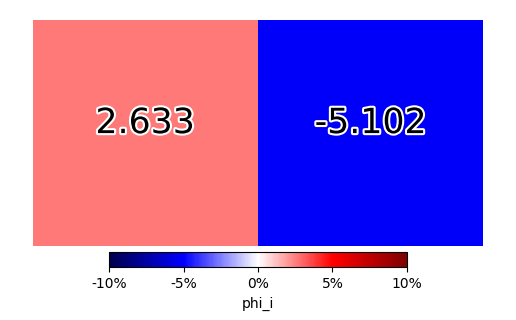

In [20]:
plot_change(gdf_change, 'w_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'Q_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'q_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'v_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'lambda_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'N_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'M_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'M_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'H_R_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'H_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'H_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'H_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'Y_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'q_ave_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')
plot_change(gdf_change, 'phi_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')

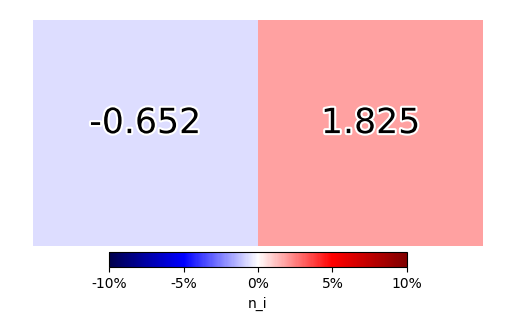

In [21]:
plot_change(gdf_change, 'n_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area2_2')

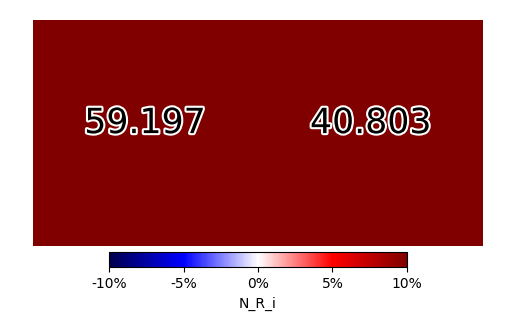

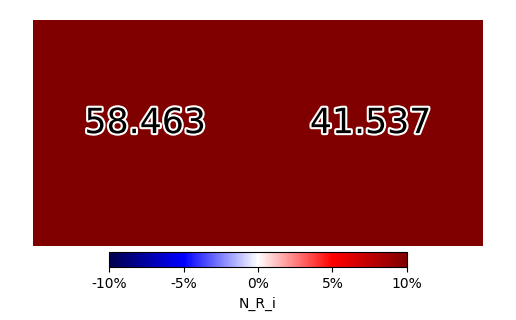

In [19]:
plot_change(gdf_rep, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_res, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')

In [22]:
print(np.round(model.exog['delta_ij'],3))

[[0.416 0.41 ]
 [0.442 0.411]]


In [23]:
print(np.round(9/24*model.rep['v_ij'],3))
print(np.round(9/24*model.res['v_ij'],3))

[[0.971 1.012]
 [0.915 1.107]]
[[0.973 1.034]
 [0.943 1.134]]


In [24]:
print(np.round(model.rep['n_ij'],3))
print(np.round(model.res['n_ij'],3))

[[1.001 1.   ]
 [1.    1.   ]]
[[1.003 1.01 ]
 [1.005 1.003]]


In [25]:
print(np.round(model.rep['mu_ij'],3))
print(np.round(model.res['mu_ij'],3))

[[0.404 0.415]
 [0.404 0.455]]
[[0.404 0.42 ]
 [0.414 0.465]]


In [26]:
print(np.round(model.rep['n_i'],2))
print(np.round(model.res['n_i'],2))

[54.56 45.48]
[54.2  46.31]


In [27]:
print(np.round(np.sum(model.rep['n_i']),2))
print(np.round(np.sum(model.res['n_i']),2))

100.04
100.51


In [28]:
plot_change(gdf, 'n_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')

NameError: name 'gdf' is not defined